Chargement des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
%matplotlib inline
pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

Chargement du dataset

In [2]:
import pandas as pd
from io import StringIO
import csv

# Nom du nouveau fichier de logs
log_file = "logs/user_events_with_geoip_25k.csv"

print(f"Tentative de lecture du fichier '{log_file}'...")

# Liste pour stocker les lignes corrigées
cleaned_lines = []
num_bad_lines = 0

try:
    with open(log_file, 'r', encoding='utf-8') as f:
        # Lire la première ligne (header) pour déterminer le nombre de colonnes attendu
        header_line = f.readline()
        cleaned_lines.append(header_line)
        
        # Le lecteur CSV nous aidera à bien gérer les guillemets
        # Le nombre de champs attendu est le nombre de virgules + 1
        expected_fields = header_line.count(',') + 1
        print(f"Nombre de champs attendus par ligne : {expected_fields}")

        # Parcourir le reste du fichier
        for i, line in enumerate(f, start=2): # On commence à la ligne 2
            # Compter le nombre de champs dans la ligne actuelle
            current_fields = line.count(',') + 1
            
            if current_fields == expected_fields:
                # La ligne est correcte, on l'ajoute
                cleaned_lines.append(line)
            else:
                # La ligne est mal formée
                num_bad_lines += 1
                # On ignore simplement la ligne pour cette approche
                # print(f"Ligne {i} ignorée: {current_fields} champs trouvés, {expected_fields} attendus.")
                continue # Passe à la ligne suivante

    print(f"\nLecture terminée. {num_bad_lines} lignes mal formées ont été ignorées.")

    # Combiner les lignes propres en une seule chaîne de caractères
    cleaned_csv_data = "".join(cleaned_lines)
    
    # Utiliser StringIO pour que Pandas lise cette chaîne comme un fichier
    csv_file_in_memory = StringIO(cleaned_csv_data)
    
    # Maintenant, le chargement avec Pandas devrait fonctionner sans erreur
    df = pd.read_csv(csv_file_in_memory, sep=',')
    
    print(f"Fichier '{log_file}' chargé avec succès dans Pandas.")
    print(f"Dimensions du DataFrame : {df.shape[0]} lignes, {df.shape[1]} colonnes")
    
except FileNotFoundError:
    print(f"ERREUR: Le fichier '{log_file}' n'a pas été trouvé. Veuillez vérifier le chemin.")
    df = None # S'assurer que df est défini même en cas d'erreur
except Exception as e:
    print(f"Une autre erreur est survenue : {e}")
    df = None

# La suite du code reste la même
if df is not None:
    # Afficher les 5 premières lignes pour vérifier
    print("\nAperçu des données brutes :")
    display(df.head())

    # Afficher les informations générales (types de données, valeurs non nulles)
    print("\nInformations sur le DataFrame :")
    df.info()

Tentative de lecture du fichier 'logs/user_events_with_geoip_25k.csv'...
Nombre de champs attendus par ligne : 11

Lecture terminée. 1 lignes mal formées ont été ignorées.
Fichier 'logs/user_events_with_geoip_25k.csv' chargé avec succès dans Pandas.
Dimensions du DataFrame : 24998 lignes, 11 colonnes

Aperçu des données brutes :


,id,hashedUserId,timestamp,eventType,authType,hashedIp,clientId,hashedUserAgent,canal,city,country
0,AZcxuryEH9C07pBMSrTQ,a80987a9bb7969773ff6c784cf192961d2878bf471753b...,2025-06-02T17:40:11.012868605Z,user_updated,NaN,00088f654394afcfc8f66dec0689d1b18ec371bef73034...,RrM6GnLigdq1cQ3tCjtk,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
1,AZcxur2UH9C07pBMSrTS,a80987a9bb7969773ff6c784cf192961d2878bf471753b...,2025-06-02T17:40:11.284875626Z,user_updated,NaN,aab4191b8207328410d31b2bb1a765cbb983ba88fc02f8...,gkqY2NL2ZsBopwVFBAGD,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
2,AZcxur4c-ICzjV_NRK5f,8faacc5cd2534c2eb78f8cd2114fc6a66f543318d9974e...,2025-06-02T17:40:11.420Z,login,password,674a135355e8b1e1e55b932e176415c3c85290676ff72c...,3efp2wUSJdNCaau1BAjS,a690ece263d309de1e2306391c6d5bf520fe29e8d50e1e...,identity_first_party,Lucca,Italy
3,AZcxur-RZr-DckSpZQlC,046ca1fafffbb29b6f9cb5dd877024d579fd98a03070e7...,2025-06-02T17:40:11.792995361Z,user_updated,NaN,1fd962dd39cc8cda613315d6e11168f5d7726913b9ebd8...,gkqY2NL2ZsBopwVFBAGD,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
4,AZcxur-7orOvtZtmN7R8,f7fd2b5c327cd330975ed6e1cf971126001579c3fe02c9...,2025-06-02T17:40:11.835Z,login,refresh,cfd5065ab4d87895601e26bd782055667e7b9d033424b6...,vNm6E4T787EOcDObKj3R,7dd784295e588d22a36f9aa4661e813c2221eb945e9755...,identity_first_party,Brussels,Belgium



Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               24998 non-null  object
 1   hashedUserId     24998 non-null  object
 2   timestamp        24998 non-null  object
 3   eventType        24998 non-null  object
 4   authType         22410 non-null  object
 5   hashedIp         24998 non-null  object
 6   clientId         24998 non-null  object
 7   hashedUserAgent  24998 non-null  object
 8   canal            24998 non-null  object
 9   city             24571 non-null  object
 10  country          24998 non-null  object
dtypes: object(11)
memory usage: 2.1+ MB


In [3]:
# Copie de sécurité
df_clean = df.copy()

# 1. Normaliser les noms de colonnes (minuscules)
df_clean.columns = df_clean.columns.str.lower()

# 2. Renommer les colonnes pour la clarté et la compatibilité
column_mapping = {
    'hasheduserid': 'user_id',
    'hashedip': 'ip_address',
    'eventtype': 'event_type',
    'authtype': 'auth_type',
    'hasheduseragent': 'user_agent_hash', # On précise que c'est un hash
    'clientid': 'client_id'
}
df_clean.rename(columns=column_mapping, inplace=True)

print("Colonnes après nettoyage et renommage :")
print(df_clean.columns.tolist())

Colonnes après nettoyage et renommage :
['id', 'user_id', 'timestamp', 'event_type', 'auth_type', 'ip_address', 'client_id', 'user_agent_hash', 'canal', 'city', 'country']


In [4]:
# Convertir la colonne 'timestamp' en objets datetime
# `errors='coerce'` transformera les dates invalides en NaT (Not a Time)
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')

# Vérifier le type de la colonne et les éventuelles erreurs de conversion
print(f"Type de la colonne 'timestamp' après conversion : {df_clean['timestamp'].dtype}")
print(f"Nombre de timestamps invalides (NaT) : {df_clean['timestamp'].isnull().sum()}")

# Trier le DataFrame par date pour avoir une chronologie des événements
df_clean.sort_values(by='timestamp', inplace=True)
df_clean.reset_index(drop=True, inplace=True)

print("\nAperçu des données avec timestamp converti et trié :")
display(df_clean.head())

Type de la colonne 'timestamp' après conversion : datetime64[ns, UTC]
Nombre de timestamps invalides (NaT) : 44

Aperçu des données avec timestamp converti et trié :


,id,user_id,timestamp,event_type,auth_type,ip_address,client_id,user_agent_hash,canal,city,country
0,AZcxuryEH9C07pBMSrTQ,a80987a9bb7969773ff6c784cf192961d2878bf471753b...,2025-06-02 17:40:11.012868605+00:00,user_updated,NaN,00088f654394afcfc8f66dec0689d1b18ec371bef73034...,RrM6GnLigdq1cQ3tCjtk,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
1,AZcxuryEH9C07pBMSrTQ,a80987a9bb7969773ff6c784cf192961d2878bf471753b...,2025-06-02 17:40:11.012868605+00:00,user_updated,NaN,00088f654394afcfc8f66dec0689d1b18ec371bef73034...,RrM6GnLigdq1cQ3tCjtk,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
2,AZcxur2UH9C07pBMSrTS,a80987a9bb7969773ff6c784cf192961d2878bf471753b...,2025-06-02 17:40:11.284875626+00:00,user_updated,NaN,aab4191b8207328410d31b2bb1a765cbb983ba88fc02f8...,gkqY2NL2ZsBopwVFBAGD,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
3,AZcxur2UH9C07pBMSrTS,a80987a9bb7969773ff6c784cf192961d2878bf471753b...,2025-06-02 17:40:11.284875626+00:00,user_updated,NaN,aab4191b8207328410d31b2bb1a765cbb983ba88fc02f8...,gkqY2NL2ZsBopwVFBAGD,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...,management,Brussels,Belgium
4,AZcxur4c-ICzjV_NRK5f,8faacc5cd2534c2eb78f8cd2114fc6a66f543318d9974e...,2025-06-02 17:40:11.420000+00:00,login,password,674a135355e8b1e1e55b932e176415c3c85290676ff72c...,3efp2wUSJdNCaau1BAjS,a690ece263d309de1e2306391c6d5bf520fe29e8d50e1e...,identity_first_party,Lucca,Italy


In [5]:
# Compter les valeurs manquantes par colonne
print("Valeurs manquantes par colonne :")
print(df_clean.isnull().sum())

# Stratégie de remplissage
# Pour les colonnes catégorielles, on peut utiliser 'inconnu'
fill_values = {
    'auth_type': 'inconnu',
    'city': 'inconnu',
    'country': 'inconnu'
}
df_clean.fillna(fill_values, inplace=True)

# Vérifier à nouveau les valeurs manquantes
print("\nValeurs manquantes après remplissage :")
print(df_clean.isnull().sum())

# Supprimer les lignes où user_id ou ip_address sont manquants, car elles sont essentielles
df_clean.dropna(subset=['user_id', 'ip_address'], inplace=True)
print(f"\nNouvelles dimensions après suppression des lignes essentielles manquantes : {df_clean.shape}")

Valeurs manquantes par colonne :
id                    0
user_id               0
timestamp            44
event_type            0
auth_type          2588
ip_address            0
client_id             0
user_agent_hash       0
canal                 0
city                427
country               0
dtype: int64

Valeurs manquantes après remplissage :
id                  0
user_id             0
timestamp          44
event_type          0
auth_type           0
ip_address          0
client_id           0
user_agent_hash     0
canal               0
city                0
country             0
dtype: int64

Nouvelles dimensions après suppression des lignes essentielles manquantes : (24998, 11)


Répartition des types d'événements (Top 15) :
event_type
login                                 19446
user_updated                           1527
login_matching_password                1280
login_not_matching_password             574
signup                                  437
login_unknown_identifier                405
unlink                                  288
password_reset_requested                258
password_reset                          211
user_deleted                            177
logout                                  128
lite_merged_into_managed                 87
user_created                             84
login_successful_suspended_account       32
eventType                                24
Name: count, dtype: int64


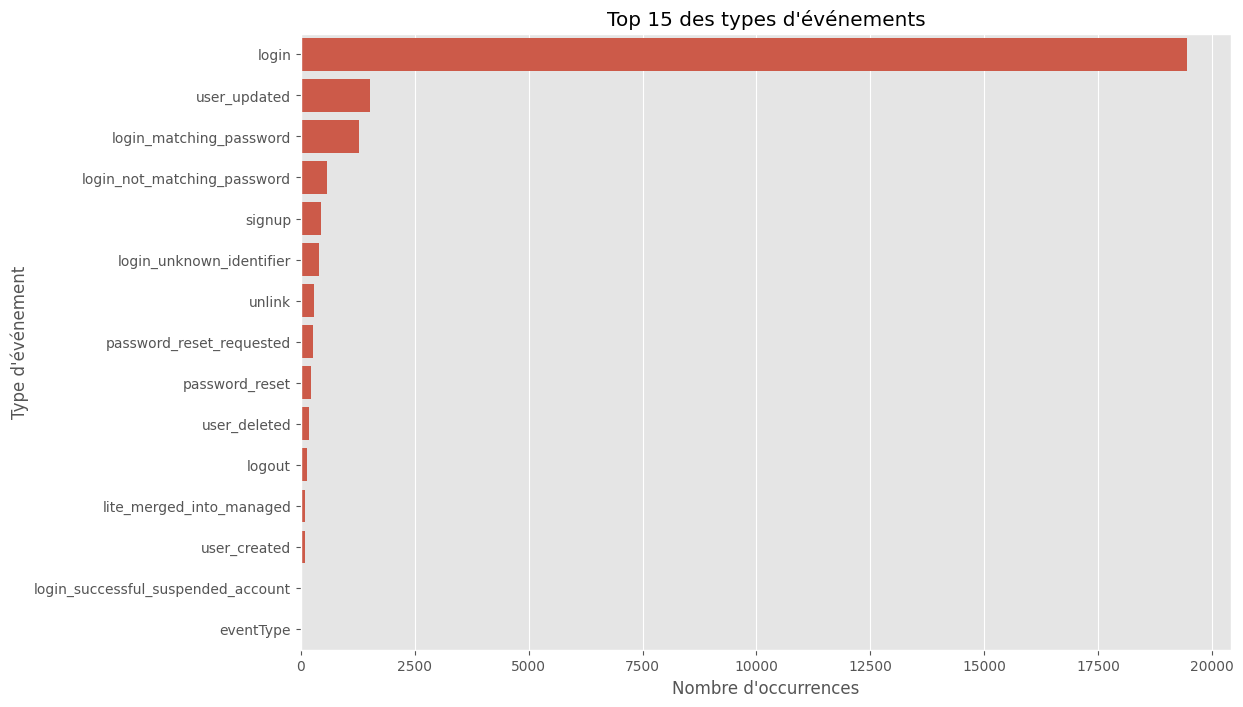


Répartition des types d'authentification :
auth_type
refresh     17424
password     3979
inconnu      2588
google        778
apple         140
facebook       65
authType       24
Name: count, dtype: int64


In [6]:
print("Répartition des types d'événements (Top 15) :")
event_counts = df_clean['event_type'].value_counts()
print(event_counts.head(15))

# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(y=event_counts.head(15).index, x=event_counts.head(15).values, orient='h')
plt.title('Top 15 des types d\'événements')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Type d\'événement')
plt.show()

print("\nRépartition des types d'authentification :")
print(df_clean['auth_type'].value_counts())

In [7]:
# On se concentre sur les événements liés à la connexion
login_events = [
    'login',
    'login_matching_password',
    'login_not_matching_password',
    'login_unknown_identifier'
]

# Filtrer le DataFrame pour ne garder que ces événements
df_logins = df_clean[df_clean['event_type'].isin(login_events)].copy()

# Créer une colonne 'login_status'
def get_login_status(event):
    if event in ['login', 'login_matching_password']:
        return 'success'
    elif event in ['login_not_matching_password', 'login_unknown_identifier']:
        return 'failure'
    else:
        return 'other'

df_logins['login_status'] = df_logins['event_type'].apply(get_login_status)

print("Répartition des statuts de connexion :")
print(df_logins['login_status'].value_counts())

print("\nAperçu du DataFrame des connexions :")
display(df_logins.head())

Répartition des statuts de connexion :
login_status
success    20726
failure      979
Name: count, dtype: int64

Aperçu du DataFrame des connexions :


,id,user_id,timestamp,event_type,auth_type,ip_address,client_id,user_agent_hash,canal,city,country,login_status
4,AZcxur4c-ICzjV_NRK5f,8faacc5cd2534c2eb78f8cd2114fc6a66f543318d9974e...,2025-06-02 17:40:11.420000+00:00,login,password,674a135355e8b1e1e55b932e176415c3c85290676ff72c...,3efp2wUSJdNCaau1BAjS,a690ece263d309de1e2306391c6d5bf520fe29e8d50e1e...,identity_first_party,Lucca,Italy,success
5,AZcxur4c-ICzjV_NRK5f,8faacc5cd2534c2eb78f8cd2114fc6a66f543318d9974e...,2025-06-02 17:40:11.420000+00:00,login,password,674a135355e8b1e1e55b932e176415c3c85290676ff72c...,3efp2wUSJdNCaau1BAjS,a690ece263d309de1e2306391c6d5bf520fe29e8d50e1e...,identity_first_party,Lucca,Italy,success
12,AZcxur-7orOvtZtmN7R8,f7fd2b5c327cd330975ed6e1cf971126001579c3fe02c9...,2025-06-02 17:40:11.835000+00:00,login,refresh,cfd5065ab4d87895601e26bd782055667e7b9d033424b6...,vNm6E4T787EOcDObKj3R,7dd784295e588d22a36f9aa4661e813c2221eb945e9755...,identity_first_party,Brussels,Belgium,success
13,AZcxur-7orOvtZtmN7R8,f7fd2b5c327cd330975ed6e1cf971126001579c3fe02c9...,2025-06-02 17:40:11.835000+00:00,login,refresh,cfd5065ab4d87895601e26bd782055667e7b9d033424b6...,vNm6E4T787EOcDObKj3R,7dd784295e588d22a36f9aa4661e813c2221eb945e9755...,identity_first_party,Brussels,Belgium,success
16,AZcxusENH9C07pBMSrTc,3863d3bbf73743ac699f04838a7d29d81bc2a1e798463b...,2025-06-02 17:40:12.173000+00:00,login,refresh,fe14787607e69d705c79db451fa77bbe721ac9f1c55b6f...,3efp2wUSJdNCaau1BAjS,cbef514453fadaafc44470bef7f3c2df6ee4740d6e51b0...,identity_first_party,Brussels,Belgium,success


In [8]:
# Nom du fichier de sortie
output_file = "logs_events_clean.csv"

# Sauvegarder le DataFrame nettoyé et enrichi
df_logins.to_csv(output_file, index=False)

print(f"Le fichier de données prétraitées a été sauvegardé sous : '{output_file}'")

Le fichier de données prétraitées a été sauvegardé sous : 'logs_events_clean.csv'
